# Proyecto de Medio Semestre.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Para el proyecto de Medio Semestre, vamos a trabajar con el dataset contenido en la siguiente pagina:

https://www.kaggle.com/datasets/dipam7/student-grade-prediction

Tu primer tarea sera descargar el archivo (viene en una carpeta comprimida .zip). Una vez descargado (y si estás en Google Colab), haz clic en el dibujo de la carpeta que aparece en la barra de la izquierda, para cargar el archivo.
SI estás trabajando con Jupyter Notebook, sólo será necesario que especifiques el _path_ correcto hacia tu archivo.

Ya que este cargado, prueba a correr la siguiente celda para leer los datos (adáptala de ser necesario).

In [3]:
df = pd.read_csv("/content/student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Objetivo del Proyecto

Par este proyecto de Medio Semestre vamos a realizar, de manera **individual** un **Análisis Exploratorio de Datos**.

(Por si tienes duda de qué es esto: recordarás que, después de entender lo mejor posible el problema a resolver, el segundo paso en el proceso del Científico de Datos es conocer muy bien los datos que tiene a la mano; para eso, se realiza un AED, o *EDA*, por sus siglas en inglés).

Un repaso de qué se puede hacer está en la siguiente página: https://www.kaggle.com/general/329404

## El problema a resolver.

Como puedes observar en la página del proyecto, en el primer link de este documento, la idea es analizar los factores que contribuyen de manera más potente en la calificación final de los estudiantes. El dataset Tiene 30 variables con características de los estudiantes y tres calificaciones, `G1`, `G2` y la calificación final, `G3`. Como son estudiantes de Portugal, las calificaciones tienen un valor máximo de 20 puntos.

En esta ocasión, **NO** vamos a llegar al modelado. No contará para su calificación del proyecto. Vamos a trabajar en un paso anterior, que es conocer bien los datos con los que estoy trabajando.

## ¿Qué se va a calificar?

El proyecto vale 30% de la calificacion final.

* Que respondas a 10 preguntas que tú mismo te hagas sobre los datos. 

Para ello, introduce una celda de texto y explícame qué pregunta tienes sobre los datos y que vas a tratar responder. Por ejemplo: ¿Qué calificaciones fueron las más comúnes?

* La gráfica que pudiera ayudarte a responder esa pregunta.

* Una pequeña conclusión.

Esta puede incluir la respuesta a la pregunta que te hiciste, si es que la pudiste resolver con tu código, o si tu respuesta es inconclusa, una hipótesis que explique qué está pasando.

### Deberás incluir:

* Al menos tres lineas de código con funciones que NO vimos en clase.
* Al menos cuatro tipos distintos de gráficos.
* Elementos que hagan más claro tu gráfico (títulos en el gráfico, en los ejes de ser requeridos, que tus ejes comiencen desde 0, colores, leyendas, etc.)
* Conclusiones apropidas - tu gráfico realmente concuerda con lo explicado en la conclusión.

Cada uno de los elementos que te falten te restarán 2/30 puntos.

### Posibles puntos extra si:

* Generas gráficos muy estéticos.
* Traduces muy bien los problemas de la vida real y los conviertes a problemas técnicos, sin perder de vista el problema que estamos tratando de resolver. Asegurate de que estes investigando asuntos relevantes (no seas taaaan especifico, ni tan general).

Fecha de Entrega: domingo 12 de marzo, 11:59 pm.


### Ejemplo:

0. ¿La mayoría de los estudiantes obtuvo una calificación final aprobatoria (10 o más puntos)?

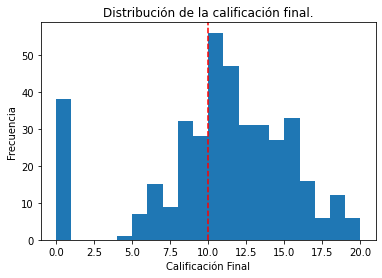

In [4]:
plt.hist(df["G3"], bins=20)
plt.title("Distribución de la calificación final.")
plt.xlabel("Calificación Final")
plt.ylabel("Frecuencia")
plt.axvline(x = 10, color = 'r', linestyle = '--')
plt.show()

Sí. La mayoría de los estudiantes en mi *dataset* obtuvo 10 o más puntos. A pesar de ello, hay un número importante de estudiantes que obtuvo 0 como calificación final.

¡Tu turno!

1. ¿De cuál dirección (Rural o urbano), los estudiantes tardan más en llegar a su escuela?

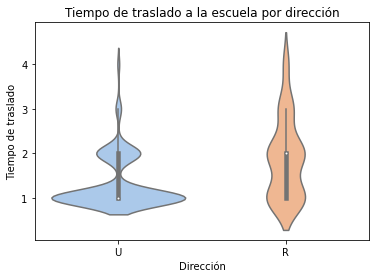

In [5]:
sns.violinplot(data=df, x="address", y="traveltime", palette="pastel")

sns.setstyle="darkgrid"
plt.xlabel("Dirección")
plt.ylabel("Tiempo de traslado")
plt.title("Tiempo de traslado a la escuela por dirección")

plt.show()



Primero hay que recordar el significado de cada intervalo:
1 = < 15 min., 2 = 15 a 30 min., 3 = 30 min. a 1 hora y 4 = >1 hora.

El gráfico de violín es una buena opción para visualizar la distribución de los datos, en este caso podemos notar como los estudiantes que viven en una zona urbana tardan en su mayoría, menos de 15 minutos en llegar a su escuela, mientras que los alumnos de la zona rural duplican a la cantidad de alumnos de la zona urbana en los intervalos 3 y 4, es decir, los alumnos de la zona rural tardan más en llegar a su respectiva escuela. 

Ahora, ¿Tendrá relación la calidad de la relación familiar con el resultado de la calificación final?

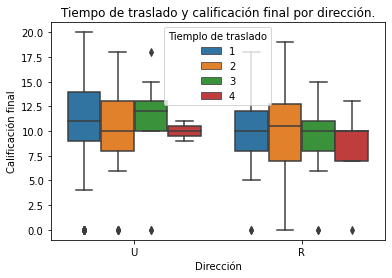

In [6]:
sns.boxplot(x='address', y='G3', hue='traveltime', data=df)

legend = plt.legend(title='Tiemplo de traslado', loc='best')

plt.title('Tiempo de traslado y calificación final por dirección.')
plt.xlabel('Dirección')
plt.ylabel('Calificación final')

plt.show()

En este caso considero que un box plot nos podría dar una idea de si existe relación entre el tiempo de traslado, la dirección y la calificación final y al parecer las calificaciones siempre se encuentran en una media de 8-10, entonces a mi parecer no tiene mucho que ver la dirección ni el tiempo de traslado en la calificación final.

Ahora específicamente el director de la escuela cree que los estudiantes cque tardan más de una hora en trasladarse a su escuela tienden a reprobar, podemos verificar si esto es cierto. (Para estos casos hipotéticos del director, vamos a suponer que los datos son de la misma escuela).

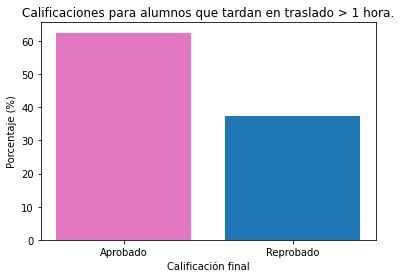

In [21]:
unahora = df[df['traveltime'] == 4]

pass_= len(unahora[unahora['G3'] >= 10]) / len(unahora) * 100
fail = len(unahora[unahora['G3'] < 10]) / len(unahora) * 100
bar_colors = ['tab:pink', 'tab:blue']
fig, ax = plt.subplots()
ax.bar(['Aprobado', 'Reprobado'], [pass_, fail], color=bar_colors)
ax.set_xlabel('Calificación final')
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Calificaciones para alumnos que tardan en traslado > 1 hora.')
plt.show()

Dado el gráfico anterior podemos desmentir la afirmación del director, puesto que nos ayuda a corroborar que los estudiantes que tienen un tiempo de traslado mayor a un ahora tienen a aprobar sus cursos.

2. El gobierno está promoviendo una iniciativa familiar en la que organiza talleres que ayuden a mejorar la calidad de la relación en las familias ya que piensan que esto afecta a las calificaciones de los estudiantes, ¿su afirmación es correcta?.

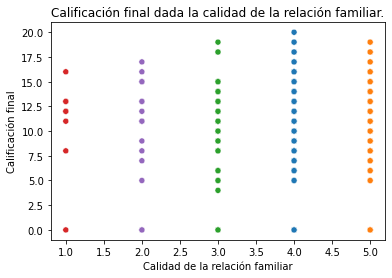

In [ ]:
colors = {
    1: 'red',    # very bad
    2: 'orange', # bad
    3: 'pink', # neutral
    4: 'green',  # good
    5: 'blue',   # very good
}
df['color'] = df['famrel'].map(colors)
sns.scatterplot(data=df, x='famrel', y='G3', hue='color')
plt.title('Calificación final dada la calidad de la relación familiar.')
plt.xlabel('Calidad de la relación familiar')
plt.legend([],[], frameon=False)
plt.ylabel('Calificación final')
plt.show()


Dado el scatter plot podemos distinguir que mientras mayor sea la calidad de la relación familiar los estudiantes parecen obtener mejores calificaciones, lo cual confirma que el gobierno está en lo correcto.

Ahora sería mejor observar específicamente los extremos, es decir, el porcentaje de alumnos que aprueban o reprueban dado que tienen o una muy buena relación familiar o muy mala.

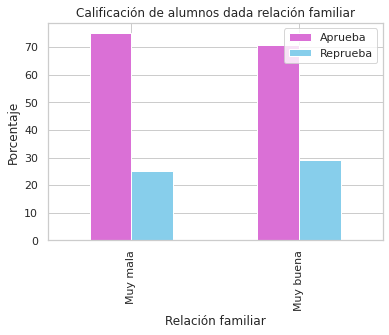

In [30]:
def famrel(data):
    filter = data[(data['famrel'] == 1) | (data['famrel'] == 5)]
    
    famrel1 = filter[filter['famrel'] == 1]
    famrel1_a = len(famrel1[famrel1['G3'] >= 10]) / len(famrel1) * 100
    famrel1_r = len(famrel1[famrel1['G3'] < 10]) / len(famrel1) * 100

    famrel5 = filter[filter['famrel'] == 5]
    famrel5_a = len(famrel5[famrel5['G3'] >= 10]) / len(famrel5) * 100
    famrel5_r = len(famrel5[famrel5['G3'] < 10]) / len(famrel5) * 100
    
    df = pd.DataFrame({'Relación familiar': ['Muy mala', 'Muy buena'], 'Aprueba': [famrel1_a, famrel5_a], 'Reprueba': [famrel1_r, famrel5_r]})
    df = df.set_index('Relación familiar')
    
    sns.set(style='whitegrid')
    ax = df.plot(kind='bar', stacked=False, color=['orchid', 'skyblue'])
    ax.set_title('Calificación de alumnos dada relación familiar')
    ax.set_xlabel('Relación familiar')
    ax.set_ylabel('Porcentaje')
    plt.legend(loc='upper right')
    plt.show()
famrel(df)

Dado el gráfico de barras anterior podemos ver que al parecer la relación familiar quizá no influye tanto como parecía en el gráfico anterior, esto también podría deberse a que los alumnos con muy mala relación familiar son 8 vs 106 que tienen muy buena relación familiar, en conclusión deben haber más factores que afecten el rendimiento del alumno.

3. El director de la escuela cree que las calificaciones del primer y segundo periodo afectan de gran manera a la calificación final, por lo que sugiere que dadas dichas calificaciones los alumnos serán o no candidatos a tomar horas extras adicionales de regulizarización, ¿Será verdad que las calificaciones intermedias (G1) y (G2) afectan el resultado de la calificación final (G3)?.

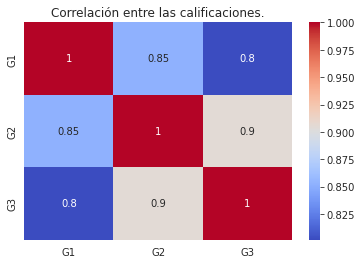

In [ ]:
corr = df[['G1', 'G2', 'G3']].corr()

sns.set_style('whitegrid')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre las calificaciones.')
plt.show()

En este gráfico, podemos ver que existe una fuerte correlación positiva entre G1 y G2 (0.86), lo que indica que los estudiantes que obtienen buenos resultados en el primer período de calificaciones también tienden a tener buenos resultados en el segundo período de calificaciones. También podemos ver que existe una correlación positiva muy fuerte entre G2 y G3 (0.9), lo que indica que los estudiantes que obtienen buenos resultados en el segundo período de calificaciones también tienden a tener buenos resultados en el período de calificaciones final. Finalmente, existe una fuerte correlación positiva entre G1 y G3 (0.8), lo que indica que los estudiantes a los que les va bien en el primer período de calificación también tienden a hacerlo bien en el último período de calificación. Por lo que la iniciativa del director parece ser buena.

4. Los directivos de la escuela buscan enviar a sus mejores estudiantes a un concurso de conocimientos pero es por rango de edad, por lo que decidieron que serían los estudiantes más jóvenes (15-16 años) los que asistirían al concurso. ¿Es verdad que la edad parece influir en el porcentaje de alumnos con nota aprobatoria?.

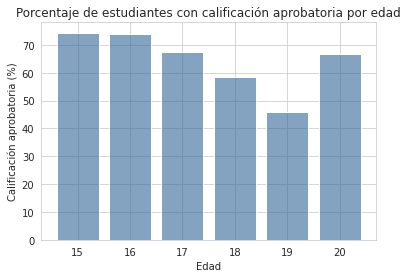

In [ ]:
age_counts = df['age'].value_counts().sort_index()
passing_counts = df[df['G3'] >= 10]['age'].value_counts().sort_index()
age_passing = passing_counts / age_counts * 100

plt.bar(age_passing.index, age_passing.values, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Edad')
plt.ylabel('Calificación aprobatoria (%)')
plt.title('Porcentaje de estudiantes con calificación aprobatoria por edad')
plt.style.use("dark_background") 
plt.show()

Para obtener la respuesta agrupamos a todas las calificaciones aprobatorias por edad y obtuvimos sus porcentajes y al parecer los alumnos de las edades 15 y 16 parecen ser los que más notas aprobatorias obtuvieron.
Ahora solo para confirmar la aseveración vamos a ver si los estudiantes de 15 y 16 años en verdad aprueban más de lo que reprueban. 

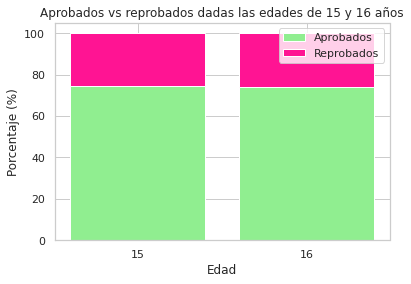

In [37]:
data = df.loc[df['age'].isin([15, 16])]

aprobados = []
reprobados = []

for age in [15, 16]:
    age_d = data.loc[data['age'] == age]
    total_count = len(age_d)
    passing_count = len(age_d.loc[age_d['G3'] >= 10])
    failing_count = len(age_d.loc[age_d['G3'] < 10])
    aprobados_p = 100 * passing_count / total_count
    reprobados_p = 100 * failing_count / total_count
    aprobados.append(aprobados_p)
    reprobados.append(reprobados_p)

ages = [15, 16]
plt.bar(ages, aprobados, color='lightgreen', label='Aprobados')
plt.bar(ages, reprobados, bottom=aprobados, color='deeppink', label='Reprobados')
plt.xticks(ages)
plt.xlabel('Edad')
plt.ylabel('Porcentaje (%)')
plt.title('Aprobados vs reprobados dadas las edades de 15 y 16 años')
plt.legend()
plt.show()


Podemos confirmar que efectivamente los alumnos con 15 y 16 tienen a aprobar más de lo que reprueban, aún así deben implementar algunas otras evaluaciones o pruebas para elegir a los alumnos correctos.

5. ¿Existe relación entre el género con respecto a las faltas y la calificación final?

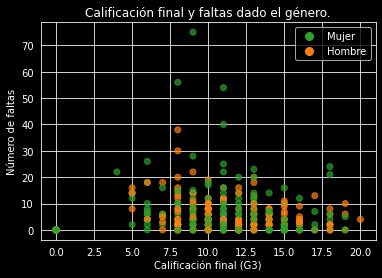

In [ ]:
plt.scatter(df['G3'], df['absences'], c=df['sex'].map({'F': 'tab:green', 'M': 'tab:orange'}), alpha=0.7)

plt.xlabel('Calificación final (G3)')
plt.ylabel('Número de faltas')
plt.title('Calificación final y faltas dado el género.')

green_patch = plt.plot([], [], marker='o', markersize=8, color='tab:green', linestyle='')[0]
orange_patch = plt.plot([], [], marker='o', markersize=8, color='tab:orange', linestyle='')[0]
plt.legend((green_patch, orange_patch), ('Mujer', 'Hombre'))

No parece exitir una correlación muy clara entre las faltas y la calificación final, pero sí parece que las mujeres tienen ligeramente mejores calificaciones y menos faltas que los hombres.

6. Los directivos y padres de familia están en un dilema ya que estos últimos aseguran que si sus hijos están en una relación o no, no tiene nada que ver con sus calificaciones finales, mientras que los directivos afirman que sí tiene que ver y por lo mismo quieren prohibirlo, ¿El que los alumnos estén o no en una relación tiene que ver con sus calificaciones finales?.

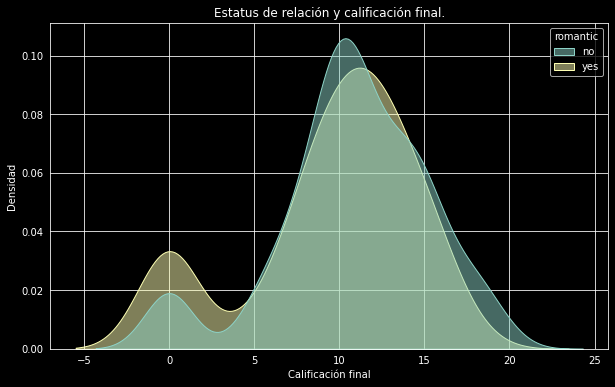

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.setstyle="darkgrid"
sns.kdeplot(data=df, x='G3', hue='romantic', fill=True, alpha=.5, common_norm=False, ax=ax)
ax.set_xlabel('Calificación final')
ax.set_ylabel('Densidad')
ax.set_title('Estatus de relación y calificación final.')
plt.style.use("dark_background") 
plt.show()

En el gráfico, podemos ver que la densidad de calificaciones finales es ligeramente mayor para los estudiantes solteros en comparación con los que están en pareja, aunque las distribuciones se superponen en gran medida. Los directivos tienen razón pero la diferencia no es tan significativa, habría que tomar en cuenta aún otras cuestiones para llegar a una decisión.


7. Los padres de familia desean saber si el estatus de salud de sus hijos afecta en la asistencia a enfermería y si esto se ve reflejado en sus calificaciones finales. ¿Existe relación entre la asistencia a la enfermería con el estado de salud y esto a su vez con las calificaciones finales?.

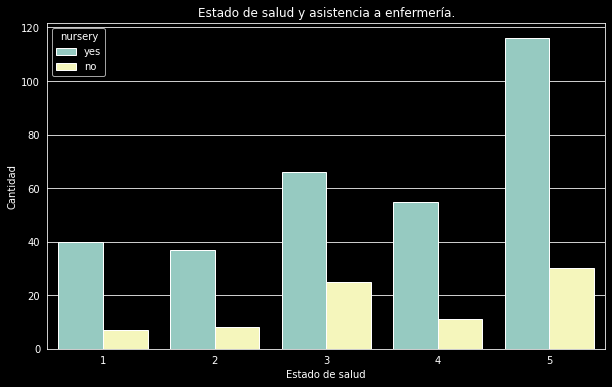

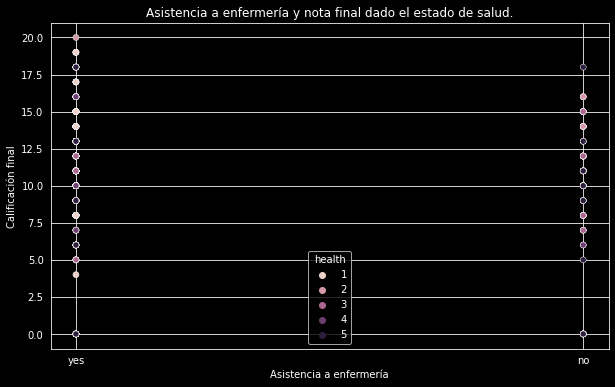

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.setstyle="darkgrid"
sns.countplot(data=df, x='health', hue='nursery', ax=ax)
ax.set_xlabel('Estado de salud')
ax.set_ylabel('Cantidad')
ax.set_title('Estado de salud y asistencia a enfermería.')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='nursery', y='G3', hue='health', ax=ax)
ax.set_xlabel('Asistencia a enfermería')
ax.set_ylabel('Calificación final')
ax.set_title('Asistencia a enfermería y nota final dado el estado de salud.')
plt.show()

A partir de la primera gráfica podemos ver que los estudiantes que tienen un estado de salud bueno o muy bueno tienen más probabilidades de asistir a la enfermería en comparación con los estudiantes con un estado de salud más bajo, esto ya que ir a la enfermería no siempre tiene que ver con el estado de salud si no más bien con los accidentes que puedan ocurrir.

En la segunda gráfica, creamos un gráfico de dispersión para visualizar la relación entre la asistencia de enfermería y las calificaciones finales, coloreadas por el estado de salud. El eje x representa el estado de asistencia de enfermería y el eje y representa la calificación final. A partir de esta gráfica, podemos ver que los estudiantes que asistieron a la enfermería tienden a tener notas finales ligeramente más altas en comparación con los que no asistieron. Además, los estudiantes con mejor estado de salud tienden a tener calificaciones finales más altas, independientemente de su estado de asistencia a la enfermería.

8. Los directivos tienen la sospecha de que los estudiantes que han reprobado materias en el pasado están tendiendo a reprobar nuevamente, así que quieren tomar cartas en el asunto, debemos verificar que esto es cierto o falso.

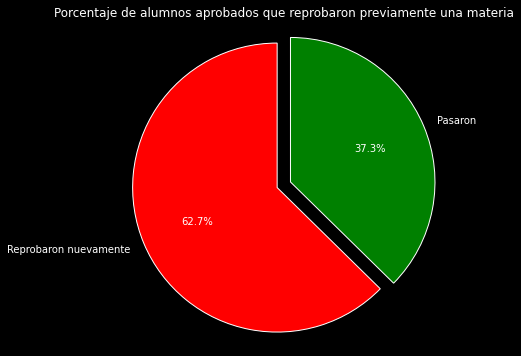

In [ ]:
fail_df = df[df['failures'] > 0]

pass_percentage = (fail_df[fail_df['G3'] >= 10]['G3'].count() / fail_df['G3'].count()) * 100
fig, ax = plt.subplots(figsize=(6, 6))
labels = ['Reprobaron nuevamente', 'Pasaron']
sizes = [100 - pass_percentage, pass_percentage]
colors = ['red', 'green']
explode = (0.1, 0)
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Porcentaje de alumnos aprobados que reprobaron previamente una materia')
plt.show()

La zona roja representa el porcentaje de estudiantes que reprobaron nuevamente y la zona verde representa el porcentaje de estudiantes que aprobaron. En esta gráfica, podemos ver que la mayoría de los estudiantes que reprobaron previamente una materia no aprueban, y solo un pequeño porcentaje de estudiantes puede mejorar sus calificaciones.

9. Muchos padres de familia creen que muchos de los alumnos que aprueban son consecuencia de que tienen padres que son maestros, ¿podemos confirmar que esto es cierto?

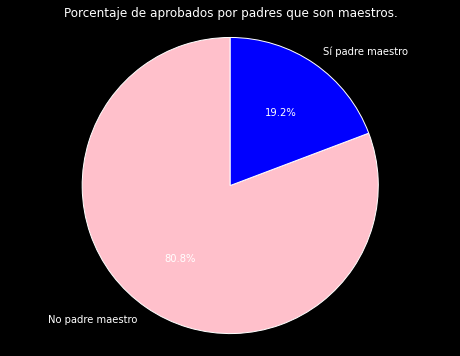

In [ ]:
df['teacher_parent'] = ((df['Mjob'] == 'teacher') | (df['Fjob'] == 'teacher')).astype(int)

passing_df = df[df['G3'] >= 10]

grouped_df = passing_df.groupby('teacher_parent')['G3'].agg(['count']).reset_index()
grouped_df['pass_percentage'] = grouped_df['count'] / grouped_df['count'].sum() * 100
colors = ['pink', 'blue']

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(grouped_df['pass_percentage'], labels=['No padre maestro', 'Sí padre maestro'], autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Porcentaje de aprobados por padres que son maestros.')
plt.show()


Usamos el gráfico circular para visualizar el porcentaje de aprobación de cada grupo en función de si un estudiante tiene una mamá o un papá que trabaja como maestro. El porcentaje de aprobación se calcula dividiendo el número de estudiantes con una calificación final de 10 o más por el número total de estudiantes en cada grupo. Podemos ver en este gráfico que los estudiantes con una mamá o un papá que trabaja como maestro tienen un porcentaje de aprobación ligeramente más alto que los estudiantes sin un padre maestro. Sin embargo, esta diferencia no es significativa y se necesitaría un análisis más profundo para determinar si existe una relación causal entre tener un padre maestro y las calificaciones aprobatorias.


10. Los directivos buscan aumentar el tiempo de estudio en los alumnos afirmando que a mayor tiempo de estudio se tienen mejores calificaciones, ¿es esto cierto?.

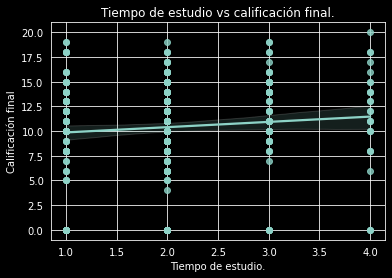

In [ ]:
sns.regplot(data=df, x="studytime", y="G3")

plt.title("Tiempo de estudio vs calificación final.")
plt.xlabel("Tiempo de estudio.")
plt.ylabel("Calificación final")
plt.style.use("dark_background") 
plt.show()

Hay que tomar en cuenta la siguiente información:
1 = <2 horas, 2 = 2 a 5 horas, 3 = 5 a 10 horas y 4 = >10 horas.

La gráfica muestra una línea de regresión del tiempo de estudio frente a la calificación final, con el tiempo de estudio en el eje x y la calificación final en el eje y. La línea de regresión representa la relación estimada entre el tiempo de estudio y la calificación final, según los datos del conjunto de datos. La pendiente de la línea de regresión indica el cambio esperado en la calificación final por cada hora adicional de estudio por semana.

En este caso, la recta de regresión tiene pendiente positiva, lo que sugiere que existe una relación positiva entre el tiempo de estudio y la nota final. Sin embargo, es importante tener en cuenta que la fuerza de esta relación es relativamente débil, ya que la línea de regresión tiene una pendiente relativamente pequeña.